## L'agent Logan

Lancé à la poursuite d'un criminel, l'agent Logan du FBI doit traverser une rivière d'une largeur de 1600 m qui coule à 0.80 m$\cdot$s$^{-1}$ en un minimum de temps et se rendre directement en face de son point de départ. Sachant qu'il peut ramer à 1.50 m$\cdot$s$^{-1}$ et courir à 3.00 m$\cdot$s$^{-1}$, décrivez la route qu'il devrait suivre (en bateau et à pied le long de la rive) pour traverser ce cours d'eau le plus rapidement possible.
Déterminez le temps minimal requis pour cette traversée.


In [1]:
from IPython.display import Image

import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import HTML

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import Arrow, OpenHead, NormalHead, VeeHead, BoxAnnotation
output_notebook()

Loading BokehJS ...

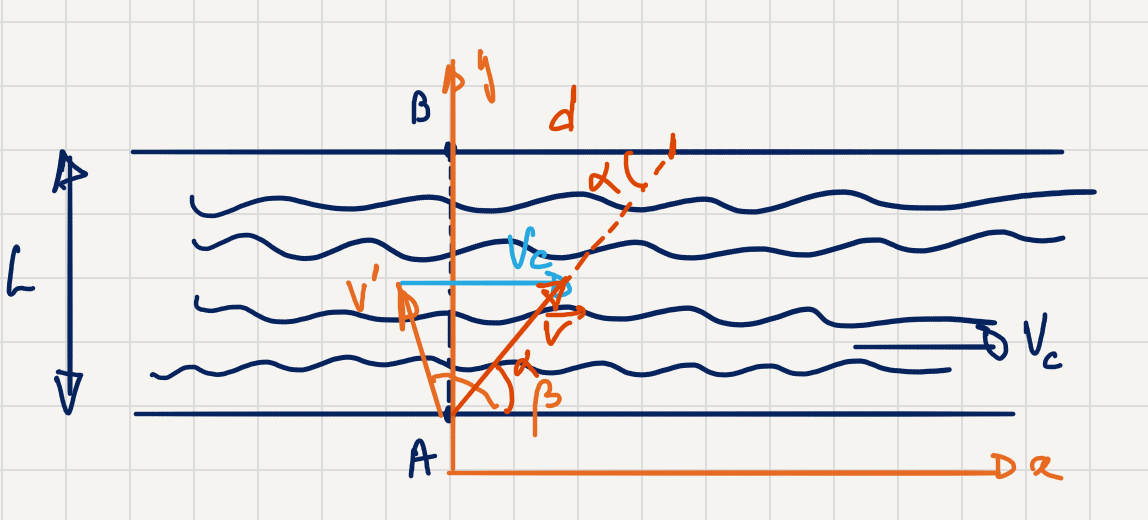

In [2]:
Image("Logan.png")


vitesse du courant: $\vec v_c$

vitesse par rapport au courant: $\vec v'$ avec $|\vec v'|=v'$ connu ($v_{rame}$)

vitesse par rapport à la rive: $\vec v=\vec v'+\vec v_c$

Composantes des vitesses:

\begin{align*}
\vec v_c&=\begin{pmatrix}v_c\\0 \end{pmatrix} & \vec v&=\begin{pmatrix}v_x=v\cos\alpha\\v_y=v\sin\alpha \end{pmatrix} & \vec v'&=\begin{pmatrix}v'\cos\beta\\v'\sin\beta \end{pmatrix}
\end{align*}
Il vient:

$$\vec v=\begin{pmatrix}v_c+v'\cos\beta\\v'\sin\beta \end{pmatrix}=\begin{pmatrix}v\cos\alpha\\v\sin\alpha \end{pmatrix}$$

Ainsi: $$\tan\alpha=\frac{v\sin\alpha}{v\cos\alpha}=\frac{v'\sin\beta}{v_c+v'\cos\beta}=\frac ld$$

Donc:
$$\boxed{d=l\frac{v_c+v'\cos\beta}{v'\sin\beta}}$$

Le temps de course sur la rive est donc donné par 

$$t_c=l\frac{v_c+v'\cos\beta}{v'\sin\beta}\frac{1}{v_{course}}$$

Le temps de traversée est donné par: $t_t=\frac l{v'\sin\beta}$

Le temps total est donc:

$$\boxed{t_{tot}=\frac l{v'\sin\beta}+l\frac{v_c+v'\cos\beta}{v'\sin\beta}\frac1{v_{course}}=l\left[\frac{v_{course}+v_c+v'\cos\beta}{v_{course}\cdot v'\sin\beta}\right]}$$

On cherche à minimiser en fonction de $\beta$:

$$\frac{\text dt_{tot}}{\text d\beta}=l\cdot\frac{-v_{course}v'\sin\beta\cdot v'\sin\beta-v_{course}v'\cos\beta\left[v_{course}+v_c+v'\cos\beta\right]}{\left[v_{course}\cdot v'\sin\beta\right]^2}=f(\beta)$$

et on cherche $f(\beta)=0$.

\begin{align*}
-v'^2v_{course}\sin^2\beta-v'v_{course}^2\cos\beta
-v_cv'v_{course}\cos\beta-v_{course}v'^2\cos^2\beta&=0\\
\end{align*}

$$\boxed{\cos\beta=\frac{-v'}{v_c+v_{course}}}$$
A.N.: $\beta=1.98$ (équivalent à 113.2°,  soit 23.2° vers l'amont). Le temps de course sera alors de 80.5 s et la traversée de 1160 s, soit un temps total de 1241.5 s (20.7 min).

# Effet de l'angle initial sur le temps total 

In [3]:
# Définition des paramètres initiaux
l = 1600 #largeur de la rivière (m)
v_courant = 0.8 # vitesse du courant (m/s)
v_ramer = 1.5 # vitesse ramer (m/s)
v_course = 3.0 # vitesse courir (m/s)
point_a = 0 # point initial
point_b = 0 # point final

beta = np.pi*120/180 # angle de départ
omega= np.pi*20/180


# vitesse initiale en x et y 
v_init_x = v_ramer*np.cos(beta)
v_init_y = v_ramer*np.sin(beta)

# temps de traversée
t_r = l/(v_ramer*np.sin(beta))
# temps total
t = l*(v_course + v_courant + v_ramer*np.cos(beta))/(v_ramer*np.sin(beta) * v_course)
# temps courir
t_c = t - t_r


# point final
d = l*(v_courant + v_ramer*np.cos(beta))/v_ramer*np.sin(beta)


p = figure(title="Logan", plot_height=360, plot_width=792, y_range=(-100,1800), x_range=(-3000,3000), 
           background_fill_color='#ffffff')

# rives
r_down = p.line(np.linspace(-5000, 5000, 1000), [0]*1000, color="#5A2806", line_width=5)
r_down = p.line(np.linspace(-5000, 5000, 1000), [l]*1000, color="#5A2806", line_width=5)

# fons de l'image
mid_box = BoxAnnotation(bottom=0, top=l, fill_alpha=0.1, fill_color='blue')
low_box = BoxAnnotation(bottom=-100, top=0, fill_alpha=0.1, fill_color='green')
top_box = BoxAnnotation(bottom=l, top=1800, fill_alpha=0.1, fill_color='green')
p.add_layout(mid_box)
p.add_layout(low_box)
p.add_layout(top_box)

# point initial
p_ini = p.circle([0], [0], size=10, fill_color='#e32020', line_color='#e32020', legend='Point Initial')
# point final
p_fi = p.circle([0], [l], size=10, fill_color='#e32020', line_color='#e32020', legend='Point Final')
# point d'arrivé
B = p.circle([d*100], [l], size=10, fill_color='#0A0451', line_color='#0A0451', legend="Point d'Arrivé")

# vecteur vitesse d'aviron
v_ramer_x = np.linspace(0, 200*np.cos(beta)*v_ramer, 100)
v_ramer_y = np.linspace(0, 200*np.sin(beta)*v_ramer, 100)
v_r = p.line(v_ramer_x, v_ramer_y, color='#D94D31', line_width=1.5, legend="Vitesse d'aviron [200m/s]")
a_v_r_up = p.line(200*np.cos(beta)*v_ramer + np.linspace(0, -100*np.cos(beta + omega), 100), \
                 200*np.sin(beta)*v_ramer + np.linspace(0, -100*np.sin(beta + omega), 100), \
                  color='#D94D31', line_width=1.5, legend="Vitesse d'aviron [200m/s]")
a_v_r_down = p.line(200*np.cos(beta)*v_ramer + np.linspace(0, -100*np.cos(beta - omega), 100), \
                 200*np.sin(beta)*v_ramer + np.linspace(0, -100*np.sin(beta - omega), 100), \
                    color='#D94D31', line_width=1.5, legend="Vitesse d'aviron [200m/s]")

# vecteur vitesse courant
v_courant_x = v_ramer_x[-1] + np.linspace(0, 200*v_ramer, 100)
v_courant_y = [v_ramer_y[-1]]*100
v_cou = p.line(v_courant_x, v_courant_y, color='#130f78', line_width=1.5, legend="Vitesse du courant [200m/s]")
a_v_cou_up = p.line(v_courant_x[-1] + np.linspace(0, +100*np.cos(np.pi + np.pi*20/180), 100), \
                 v_courant_y[-1] + np.linspace(0, +100*np.sin(np.pi + np.pi*20/180), 100), \
                  color='#130f78', line_width=1.5, legend="Vitesse du courant [200m/s]")
a_v_cou_down = p.line(v_courant_x[-1] + np.linspace(0, 100*np.cos(np.pi - np.pi*20/180), 100), \
                 v_courant_y[-1] + np.linspace(0, 100*np.sin(np.pi - np.pi*20/180), 100), \
                    color='#130f78', line_width=1.5, legend="Vitesse du courant [200m/s]")

# vecteur vitesse par raport au courant
v_totale = p.line(np.linspace(0 ,v_courant_x[-1], 100), np.linspace(0, v_courant_y[-1], 100), color='#40ba2d',\
                   line_width=1.5, legend="Vitesse par rapport au courant [200m/s]")
alpha = np.arctan2(v_courant_y[-1],v_courant_x[-1])
a_v_totale_up = p.line( v_courant_x[-1] - np.linspace(0, 100*np.cos(alpha + omega), 100), \
                 v_courant_y[-1] + np.linspace(0, +100*np.sin(alpha + omega), 100), \
                  color='#40ba2d', line_width=1.5, legend="Vitesse par rapport au courant [200m/s]")
a_v_totale_down = p.line( v_courant_x[-1] - np.linspace(0, 100*np.cos(alpha - omega), 100), \
                 v_courant_y[-1] + np.linspace(0, 100*np.sin(alpha - omega), 100), \
                    color='#40ba2d', line_width=1.5, legend="Vitesse par rapport au courant [200m/s]")

# trajectoire
traj = p.line(np.linspace(0, d*100, 100), np.linspace(0, l, 100), legend='Trajectoire', \
              color='#ccce2b', line_width=1.5, alpha=0.5, line_dash='dashed')

def update(beta):
    beta = np.pi*beta/180
    
    # mettre à jour vitesse
    v_ramer_x = np.linspace(0, 200*np.cos(beta)*v_ramer, 100)
    v_ramer_y = np.linspace(0, 200*np.sin(beta)*v_ramer, 100)
    v_courant_x = v_ramer_x[-1] + np.linspace(0, 200*v_courant, 100)
    v_courant_y = [v_ramer_y[-1]]*100
    alpha = np.arctan2(v_courant_y[-1],v_courant_x[-1])

    
    b = l*(v_courant + np.cos(beta)*v_ramer)/v_ramer*np.sin(beta)
    
    # mettre à jour temps
    t_r = l/(v_ramer*np.sin(beta))
    t_c = l*(v_courant + v_ramer*np.cos(beta))/(v_ramer*np.sin(beta) * v_course)
    t = abs(t_r) + abs(t_c)

    
    v_r.data_source.data['x'] = v_ramer_x
    v_r.data_source.data['y'] = v_ramer_y
    a_v_r_up.data_source.data['x'] = v_ramer_x[-1] + np.linspace(0, -100*np.cos(beta + omega), 100)
    a_v_r_up.data_source.data['y'] = v_ramer_y[-1] + np.linspace(0, -100*np.sin(beta + omega), 100)
    a_v_r_down.data_source.data['x'] = v_ramer_x[-1] + np.linspace(0, -100*np.cos(beta - omega), 100)
    a_v_r_down.data_source.data['y'] = v_ramer_y[-1] + np.linspace(0, -100*np.sin(beta - omega), 100)
    
    v_cou.data_source.data['x'] = v_courant_x
    v_cou.data_source.data['y'] = v_courant_y
    
    a_v_cou_up.data_source.data['x'] = v_courant_x[-1] + np.linspace(0, +100*np.cos(np.pi + np.pi*20/180), 100)
    a_v_cou_up.data_source.data['y'] = v_courant_y[-1] + np.linspace(0, +100*np.sin(np.pi + np.pi*20/180), 100)
    a_v_cou_down.data_source.data['x'] = v_courant_x[-1] + np.linspace(0, +100*np.cos(np.pi - np.pi*20/180), 100)
    a_v_cou_down.data_source.data['y'] = v_courant_y[-1] + np.linspace(0, +100*np.sin(np.pi - np.pi*20/180), 100)
    
    v_totale.data_source.data['x'] = np.linspace(0, v_courant_x[-1], 100)
    v_totale.data_source.data['y'] = np.linspace(0, v_courant_y[-1], 100)
    
    a_v_totale_up.data_source.data['x'] =  v_courant_x[-1] - np.linspace(0, 100*np.cos(alpha + omega), 100)
    a_v_totale_up.data_source.data['y'] = v_courant_y[-1] - np.linspace(0, 100*np.sin(alpha + omega), 100)
    a_v_totale_down.data_source.data['x'] = v_courant_x[-1] - np.linspace(0, 100*np.cos(alpha - omega), 100)
    a_v_totale_down.data_source.data['y'] = v_courant_y[-1] - np.linspace(0, 100*np.sin(alpha - omega), 100)
    
    B.data_source.data['x'] = [b]
    
    traj.data_source.data['x'] = np.linspace(0, b, 100)
    
    print('Temps de navigation: {:0.1f}s'.format(t_r))
    print('Temps courant      : {:0.1f}s'.format(abs(t_c)))
    print('Temps total        : {:0.1f}s'.format(t))
    
    push_notebook()
    
    
show(p, notebook_handle=True)
interact(update,\
         beta=widgets.FloatSlider(min=90,max=179,step=1,value=113.2, description='$Beta$:')); 

interactive(children=(FloatSlider(value=113.2, description='$Beta$:', max=179.0, min=90.0, step=1.0), Output()…

# Demo: Variation des vitesses 

In [4]:
# Définition des paramètres initiaux
l = 1600 #largeur de la rivière (m)
v_courant = 0.8 # vitesse du courant (m/s)
v_ramer = 1.5 # vitesse ramer (m/s)
v_course = 3.0 # vitesse courir (m/s)

beta = np.pi*120/180 # angle de départ
omega= np.pi*20/180

# vitesse initiale en x et y 
v_init_x = v_ramer*np.cos(beta)
v_init_y = v_ramer*np.sin(beta)

# temps de traversée
t_r = l/(v_ramer*np.sin(beta))
# temps total
t = l*(v_course + v_courant + v_ramer*np.cos(beta))/(v_ramer*np.sin(beta) * v_course)
# temps courir
t_c = t - t_r

# point d'arrivé
d = l*(v_courant + v_ramer*np.cos(beta))/v_ramer*np.sin(beta)


p = figure(title="Logan", plot_height=360, plot_width=792, y_range=(-100,1800), x_range=(-3000,3000), 
           background_fill_color='#ffffff')

# rives
r_down = p.line(np.linspace(-5000, 5000, 1000), [0]*1000, color="#5A2806", line_width=5)
r_down = p.line(np.linspace(-5000, 5000, 1000), [l]*1000, color="#5A2806", line_width=5)

# fons de l'image
mid_box = BoxAnnotation(bottom=0, top=l, fill_alpha=0.1, fill_color='blue')
low_box = BoxAnnotation(bottom=-100, top=0, fill_alpha=0.1, fill_color='green')
top_box = BoxAnnotation(bottom=l, top=1800, fill_alpha=0.1, fill_color='green')
p.add_layout(mid_box)
p.add_layout(low_box)
p.add_layout(top_box)

# point initial
p_ini = p.circle([0], [0], size=10, fill_color='#e32020', line_color='#e32020', legend='Point Initial')
# point final
p_fi = p.circle([0], [l], size=10, fill_color='#e32020', line_color='#e32020', legend='Point Final')
# point d'arrivé
B = p.circle([d*100], [l], size=10, fill_color='#0A0451', line_color='#0A0451', legend="Point d'Arrivé")


# vecteur vitesse d'aviron
v_ramer_x = np.linspace(0, 200*np.cos(beta)*v_ramer, 100)
v_ramer_y = np.linspace(0, 200*np.sin(beta)*v_ramer, 100)
v_r = p.line(v_ramer_x, v_ramer_y, color='#D94D31', line_width=1.5, legend="Vitesse d'aviron [200m/s]")
a_v_r_up = p.line(200*np.cos(beta)*v_ramer + np.linspace(0, -100*np.cos(beta + omega), 100), \
                 200*np.sin(beta)*v_ramer + np.linspace(0, -100*np.sin(beta + omega), 100), \
                  color='#D94D31', line_width=1.5, legend="Vitesse d'aviron [200m/s]")
a_v_r_down = p.line(200*np.cos(beta)*v_ramer + np.linspace(0, -100*np.cos(beta - omega), 100), \
                 200*np.sin(beta)*v_ramer + np.linspace(0, -100*np.sin(beta - omega), 100), \
                    color='#D94D31', line_width=1.5, legend="Vitesse d'aviron [200m/s]")

# vecteur vitesse courant
v_courant_x = v_ramer_x[-1] + np.linspace(0, 200*v_ramer, 100)
v_courant_y = [v_ramer_y[-1]]*100
v_cou = p.line(v_courant_x, v_courant_y, color='#130f78', line_width=1.5, legend="Vitesse du courant [200m/s]")
a_v_cou_up = p.line(v_courant_x[-1] + np.linspace(0, +100*np.cos(np.pi + np.pi*20/180), 100), \
                 v_courant_y[-1] + np.linspace(0, +100*np.sin(np.pi + np.pi*20/180), 100), \
                  color='#130f78', line_width=1.5, legend="Vitesse du courant [200m/s]")
a_v_cou_down = p.line(v_courant_x[-1] + np.linspace(0, 100*np.cos(np.pi - np.pi*20/180), 100), \
                 v_courant_y[-1] + np.linspace(0, 100*np.sin(np.pi - np.pi*20/180), 100), \
                    color='#130f78', line_width=1.5, legend="Vitesse du courant [200m/s]")

# vecteur vitesse par raport au courant
v_totale = p.line(np.linspace(0 ,v_courant_x[-1], 100), np.linspace(0, v_courant_y[-1], 100), color='#40ba2d',\
                   line_width=1.5, legend="Vitesse par rapport au courant [200m/s]")
alpha = np.arctan2(v_courant_y[-1],v_courant_x[-1])
a_v_totale_up = p.line(v_courant_x[-1] + np.linspace(0, +100*np.cos(alpha + omega), 100), \
                 v_courant_y[-1] + np.linspace(0, +100*np.sin(alpha + omega), 100), \
                  color='#40ba2d', line_width=1.5, legend="Vitesse par rapport au courant [200m/s]")
a_v_totale_down = p.line(v_courant_x[-1] + np.linspace(0, 100*np.cos(alpha - omega), 100), \
                 v_courant_y[-1] + np.linspace(0, 100*np.sin(alpha - omega), 100), \
                    color='#40ba2d', line_width=1.5, legend="Vitesse par rapport au courant [200m/s]")

# trajectoire
traj = p.line(np.linspace(0, d*100, 100), np.linspace(0, l, 100), legend='Trajectoire', \
              color='#ccce2b', line_width=1.5, alpha=0.5, line_dash='dashed')

def update(beta, v_course, v_ramer, v_courant):
    beta = np.pi*beta/180
    
    # mettre à jour vitesse
    v_ramer_x = np.linspace(0, 200*np.cos(beta)*v_ramer, 100)
    v_ramer_y = np.linspace(0, 200*np.sin(beta)*v_ramer, 100)
    v_courant_x = v_ramer_x[-1] + np.linspace(0, 200*v_courant, 100)
    v_courant_y = [v_ramer_y[-1]]*100
    
    alpha = np.arctan2(v_courant_y[-1],v_courant_x[-1])
    
    b = l*(v_courant + np.cos(beta)*v_ramer)/v_ramer*np.sin(beta)
    
    # mettre à jour temps
    t_r = l/(v_ramer*np.sin(beta))
    t_c = l*(v_courant + v_ramer*np.cos(beta))/(v_ramer*np.sin(beta) * v_course)
    t = abs(t_r) + abs(t_c)
    
    
    v_r.data_source.data['x'] = v_ramer_x
    v_r.data_source.data['y'] = v_ramer_y
    a_v_r_up.data_source.data['x'] = v_ramer_x[-1] + np.linspace(0, -100*np.cos(beta + omega), 100)
    a_v_r_up.data_source.data['y'] = v_ramer_y[-1] + np.linspace(0, -100*np.sin(beta + omega), 100)
    a_v_r_down.data_source.data['x'] = v_ramer_x[-1] + np.linspace(0, -100*np.cos(beta - omega), 100)
    a_v_r_down.data_source.data['y'] = v_ramer_y[-1] + np.linspace(0, -100*np.sin(beta - omega), 100)
    
    v_cou.data_source.data['x'] = v_courant_x
    v_cou.data_source.data['y'] = v_courant_y
    
    a_v_cou_up.data_source.data['x'] = v_courant_x[-1] + np.linspace(0, +100*np.cos(np.pi + np.pi*20/180), 100)
    a_v_cou_up.data_source.data['y'] = v_courant_y[-1] + np.linspace(0, +100*np.sin(np.pi + np.pi*20/180), 100)
    a_v_cou_down.data_source.data['x'] = v_courant_x[-1] + np.linspace(0, +100*np.cos(np.pi - np.pi*20/180), 100)
    a_v_cou_down.data_source.data['y'] = v_courant_y[-1] + np.linspace(0, +100*np.sin(np.pi - np.pi*20/180), 100)
    
    v_totale.data_source.data['x'] = np.linspace(0, v_courant_x[-1], 100)
    v_totale.data_source.data['y'] = np.linspace(0, v_courant_y[-1], 100)
    
    a_v_totale_up.data_source.data['x'] =  v_courant_x[-1] - np.linspace(0, 100*np.cos(alpha + omega), 100)
    a_v_totale_up.data_source.data['y'] = v_courant_y[-1] - np.linspace(0, 100*np.sin(alpha + omega), 100)
    a_v_totale_down.data_source.data['x'] = v_courant_x[-1] - np.linspace(0, 100*np.cos(alpha - omega), 100)
    a_v_totale_down.data_source.data['y'] = v_courant_y[-1] - np.linspace(0, 100*np.sin(alpha - omega), 100)

    
    B.data_source.data['x'] = [b]
    
    traj.data_source.data['x'] = np.linspace(0, b, 100)
    
    print('Temps de navigation: {:0.1f}s'.format(t_r))
    print('Temps courant      : {:0.1f}s'.format(abs(t_c)))
    print('Temps total        : {:0.1f}s'.format(t))
    
    push_notebook()
    
    
    
show(p, notebook_handle=True)
interact(update,\
         beta=widgets.FloatSlider(min=90,max=179,step=1,value=113.2, description='$Beta$:'), \
        v_course=widgets.FloatSlider(min=0.5,max=5.0,step=0.05,value=3.0, description='$v_{course} [m/s]$:'),\
        v_ramer=widgets.FloatSlider(min=0.5,max=5,step=0.05,value=1.5, description='$v_{rame} [m/s]$:'),\
        v_courant=widgets.FloatSlider(min=0.1,max=3,step=0.05,value=0.8, description='$v_{c} [m/s]$:') ); 
         

interactive(children=(FloatSlider(value=113.2, description='$Beta$:', max=179.0, min=90.0, step=1.0), FloatSli…